In [74]:
# importer pour le traitement des listes et pour l'affichage
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# keras : importer la base de données and creation de notre reseau
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils


In [75]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

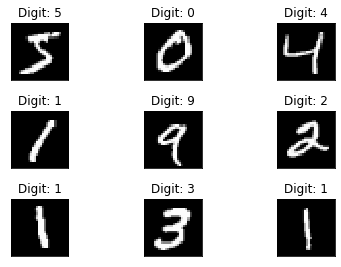

In [78]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [80]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Matrice d'entrainement", X_train.shape)
print("Matrice d'evaluation", X_test.shape)

Matrice d'entrainement (60000, 784)
Matrice d'evaluation (10000, 784)


In [81]:
# one-hot codage avec numpy pour les utiliser dans le model keras
n_classes = 10
print("Dimensions avant one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Dimensions avant one-hot encoding: ", Y_train.shape)

Dimensions avant one-hot encoding:  (60000,)
Dimensions avant one-hot encoding:  (60000, 10)


In [82]:
# creation d'un reseau de 3 couches qui contient 512, 512, 10 neurones
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

In [84]:
# definition des parametres d'optimisation et la fonction de loss
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# l'entrainement du model
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=15,
          verbose=2,
          validation_data=(X_test, Y_test))

Epoch 1/15
469/469 - 4s - loss: 0.0444 - accuracy: 0.9855 - val_loss: 0.0648 - val_accuracy: 0.9790 - 4s/epoch - 9ms/step
Epoch 2/15
469/469 - 3s - loss: 0.0410 - accuracy: 0.9866 - val_loss: 0.0663 - val_accuracy: 0.9789 - 3s/epoch - 7ms/step
Epoch 3/15
469/469 - 3s - loss: 0.0371 - accuracy: 0.9879 - val_loss: 0.0626 - val_accuracy: 0.9804 - 3s/epoch - 7ms/step
Epoch 4/15
469/469 - 3s - loss: 0.0364 - accuracy: 0.9885 - val_loss: 0.0675 - val_accuracy: 0.9788 - 3s/epoch - 7ms/step
Epoch 5/15
469/469 - 3s - loss: 0.0327 - accuracy: 0.9896 - val_loss: 0.0732 - val_accuracy: 0.9789 - 3s/epoch - 7ms/step
Epoch 6/15
469/469 - 4s - loss: 0.0317 - accuracy: 0.9898 - val_loss: 0.0633 - val_accuracy: 0.9809 - 4s/epoch - 8ms/step
Epoch 7/15
469/469 - 4s - loss: 0.0298 - accuracy: 0.9905 - val_loss: 0.0653 - val_accuracy: 0.9796 - 4s/epoch - 8ms/step
Epoch 8/15
469/469 - 4s - loss: 0.0280 - accuracy: 0.9908 - val_loss: 0.0702 - val_accuracy: 0.9803 - 4s/epoch - 8ms/step
Epoch 9/15
469/469 - 4s 

In [86]:
loss_and_metrics = model.evaluate(X_test, Y_test, verbose=2)

print("Test Loss", loss_and_metrics[0]*100, "%")
print("Test Accuracy", loss_and_metrics[1]*100, "%")

313/313 - 1s - loss: 0.0641 - accuracy: 0.9822 - 733ms/epoch - 2ms/step
Test Loss 6.409822404384613 %
Test Accuracy 98.2200026512146 %
